<h1 style="font-size:35px;
        color:black;
        ">Lab 3 Quantum Phase Estimation</h1>

Prerequisite
- [Ch.3.5 Quantum Fourier Transform](https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)
- [Ch.3.6 Quantum Phase Estimation](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html)

Other relevant materials
- [QCQI] Michael A. Nielsen and Isaac L. Chuang. 2011. Quantum Computation and Quantum Information

In [1]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.mitigation.measurement import *
import matplotlib.pyplot as plt

/var/folders/9d/120xs_y93rbgd7vklz1_82tm0000gn/T/ipykernel_31115/35548535.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import *


<h2 style="font-size:24px;">Part 1: Performance of Quantum Phase Estimation</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Investigate the relationship between the number of qubits required for the desired accuracy of the phase estimation with high probability.</p>
</div>


The accuracy of the estimated value through Quantum Phase Estimation (QPE) and its probability of success depend on the number of qubits employed in QPE circuits. In this lab, we examine the number of qubits required to accomplish the desired accuracy and the probability of success in determining the phase through QPE.

<h3 style="font-size: 20px">1. Find the probability of obtaining the estimation for a phase value accurate to $2^{-2}$ successfully with four counting qubits.</h3> 

<h4 style="font-size: 17px">&#128211;Step A. Set up the QPE circuit with four counting qubits and save the circuit to the variable 'qc4'.  Execute 'qc4' on a Aer simulator.  Plot the histogram of the result.</h4>

Check the QPE chapter in Qiskit textbook ( go to `3. Example: Getting More Precision` section [here](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html#3.-Example:-Getting-More-Precision-) ) for the circuit.

In [2]:
#Quantum Fouriter transform
def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

#Inverse Quantum Fourier Transform
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [3]:
## Start your code to create the circuit, qc4
import math
qpe = QuantumCircuit(5,4) # initializing 4 qubit circuit
qpe.x(4) # why the x gate?

for qubit in range(4): # counting bits?
    qpe.h(qubit)

reps = 1
for count_qubit in range(4):
    for i in range(reps):
        qpe.cp(2*math.pi/3, count_qubit, 4)
    reps *=2

qpe.barrier()
qft_dagger(qpe,4)
qpe.barrier()

for n in range(4):
    qpe.measure(n,n)



qpe.draw()

┌───┐                                                            »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────»
     ├───┤ │                                                          »
q_1: ┤ H ├─┼─────────■─────────■──────────────────────────────────────»
     ├───┤ │         │         │                                      »
q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■────────»
     ├───┤ │         │         │         │         │         │        »
q_3: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
     ├───┤ │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
q_4: ┤ X ├─■─────────■─────────■─────────■─────────■─────────■────────»
     └───┘                                                            »
c: 4/═════════════════════════════════════════════════════════════════»
                                                                      »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ─■────────────────────────────────────────────────────────────────────»
«      │                                                                    »
«q_3: ─┼─────────■─────────■─────────■─────────■─────────■─────────■────────»
«      │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
«q_4: ─■─────────■─────────■─────────■─────────■─────────■─────────■────────»
«                                                                           »
«c: 4/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                          ░    ┌───┐                                   »
«q_0: ─────────────────────░──X─┤ H ├─■──────────────■──────────────────»
«                          ░  │ └───┘ │P(-π/2) ┌───┐ │                  »
«q_1: ─────────────────────░──┼───X───■────────┤ H ├─┼─────────■────────»
«                          ░  │   │            └───┘ │P(-π/4)  │P(-π/2) »
«q_2: ─────────────────────░──┼───X──────────────────■─────────■────────»
«                          ░  │                                         »
«q_3: ─■─────────■─────────░──X─────────────────────────────────────────»
«      │P(2π/3)  │P(2π/3)  ░                                            »
«q_4: ─■─────────■─────────░────────────────────────────────────────────»
«                          ░                                            »
«c: 4/══════════════════════════════════════════════════════════════════»
«                                                                       »
«                                              ░ ┌─┐         
«q_0: ─■───────────────────────────────────────░─┤M├─────────
«      │                                       ░ └╥┘┌─┐      
«q_1: ─┼──────────────■────────────────────────░──╫─┤M├──────
«      │        ┌───┐ │                        ░  ║ └╥┘┌─┐   
«q_2: ─┼────────┤ H ├─┼─────────■──────────────░──╫──╫─┤M├───
«      │P(-π/8) └───┘ │P(-π/4)  │P(-π/2) ┌───┐ ░  ║  ║ └╥┘┌─┐
«q_3: ─■──────────────■─────────■────────┤ H ├─░──╫──╫──╫─┤M├
«                                        └───┘ ░  ║  ║  ║ └╥┘
«q_4: ─────────────────────────────────────────░──╫──╫──╫──╫─
«                                              ░  ║  ║  ║  ║ 
«c: 4/════════════════════════════════════════════╩══╩══╩══╩═
«                                                 0  1  2  3

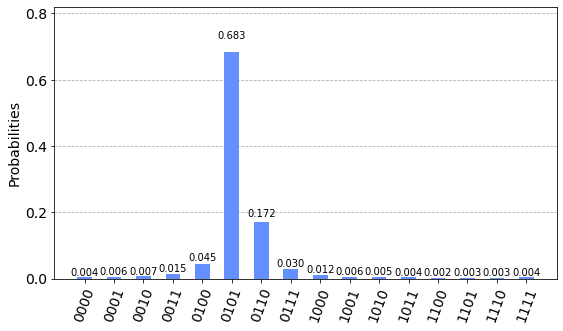

In [4]:
## Run this cell to simulate 'qc4' and to plot the histogram of the result
sim = Aer.get_backend('aer_simulator')
shots = 20000
count_qpe = execute(qpe, sim, shots=shots).result().get_counts()
plot_histogram(count_qpe, figsize=(9,5))

Having performed `Step A` successfully, you will have obtained a distribution similar to the one shown below with the highest probability at `0101` which corresponds to the estimated $\phi$ value, `0.3125`.

![](image/L3_qc4_hist.png)

Since the number of counting qubits used for the circuit is four, the best estimated value should be accurate to $\delta = 2^{-4} = 0.0625$.  However, there are multiple possible outcomes as $\theta = 1/3$ cannot be expressed in a finite number of bits, the estimation by QPE here is not always bounded by this accuracy. 

Running the following cell shows the same histogram but with all possible estimated $\phi$ values on the x-axis.

In [5]:
t = 4 # number of counting bits.

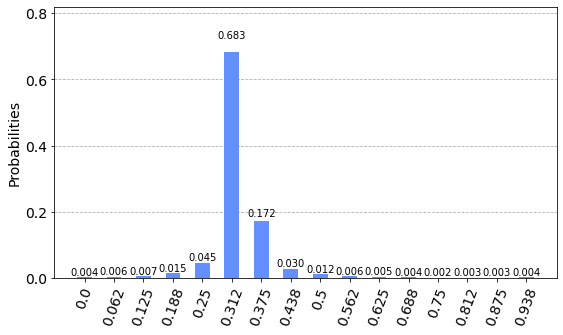

In [6]:
phi_est = np.array([round(int(key, 2)/2**t,3) for key in list(count_qpe.keys())])
key_new = list(map(str, phi_est))
count_new = dict(zip(key_new, count_qpe.values()))
plot_histogram(count_new, figsize=(9,5))

**Suppose the outcome of the final measurement is $m$, and let $b$ the best estimation which is `0.3125` for this case.**
<h4 style="font-size: 17px">&#128211;Step B. Find $e$, the maximum difference in integer from the best estimation <code>0101</code> so that all the outcomes, 'm's, would approximate $\phi$ to an accuracy $2^{-2}$ when $|m - b| \leq \frac{e}{2^{t}}$. </h4>

In this case, the values of $t$ and $b$ are $4$ and $0.3125$, respectively.

For example, under $e = 1$, the considered outcomes are `0100`, `0101`, `0110` which correspond to the values of $m$: $0.25,~0.312,~0.375$, respectively, and all of them approximate the value $\frac{1}{3}$ to an accuracy $2^{-2}$.

In [7]:
key = [] # list to store the keys in count_new
key_left = [] # list to store the keys to the left of our best estimate.
key_right = [] # list to store the keys to the right of our best estimate.

for k in count_new.keys(): 
    k = float(k) # key values are string type. We need to convert them to floats.
    key.append(k)
    
key.sort() # sorting the 'key' list in ascending order to mimic the order of the x-axis on the histogram.

# splitting the 'key' list from the value of our best estimate.
key_left = key[0:6] 
key_right = key[5:]

#check to see if job is done correctly.
print(key)
print(key_left)
print(key_right)

[0.0, 0.062, 0.125, 0.188, 0.25, 0.312, 0.375, 0.438, 0.5, 0.562, 0.625, 0.688, 0.75, 0.812, 0.875, 0.938]
[0.0, 0.062, 0.125, 0.188, 0.25, 0.312]
[0.312, 0.375, 0.438, 0.5, 0.562, 0.625, 0.688, 0.75, 0.812, 0.875, 0.938]


In [9]:
max_diff_left  = 0 # |m - b|

for e_left in range(0,len(key_left)):    
    
    if np.abs(1./3. - key_left[len(key_left)-e_left-1]) <= 0.25: # accuracy condition
        
        max_diff_left = e_left/2**t 
        
    else:
        print(e_left) # if the condition breaks, print the index and break
        break
        
max_diff_right = 0 # |m-b|

for e_right in range(0,len(key_right)):
    
    if np.abs(1./3. - key_right[e_right]) <= 0.25: # accuracy condition
        
        max_diff_right = e_right/2**t # if met
        
    else:
        print(e_right) # if not, print the index and break.
        break    
    
    
    

4
5


### e = 3 is the maximum difference in integer from the best estimate

<h4 style="font-size: 17px">&#128211;Step C. Compute the probability of obtaining an approximation correct to an accuracy $2^{-2}$.  Verify that the computed probability value is larger or equal to $1- \frac{1}{2(2^{(t-n)}-2)}$ where $t$ is the number of counting bits and the $2^{-n}$ is the desired accuracy. </h4>

Now it is easy to evaluate the probability of the success from the histogram since all the outcomes that approximate $\phi$ to the accuracy $2^{-2}$ can be found based on the maximum difference $e$ from the best estimate. 

## Steps to solve this section.
We need to add the probabilities to the left and right of our best estimate. It requires some prep work shown below.


First we need to extract the values in count_new dictionary in the same order as represented on the histogram.


Then we have to sum up the probabilities 3 places (since e = 3) to the left and right of our best estimate (including the probability of our best estimate). 


Finally, we have to compare the summed up probability to a threshold value.


In [19]:
l = list(count_new.items()) #converting count_new dict to list

l.sort() # sorting the new list in ascending order

l_new = dict(l) #converting the new sorted list back to a dict.

print(l_new) #check if job is done.

{'0.0': 78, '0.062': 113, '0.125': 140, '0.188': 302, '0.25': 901, '0.312': 13660, '0.375': 3438, '0.438': 591, '0.5': 238, '0.562': 123, '0.625': 110, '0.688': 80, '0.75': 47, '0.812': 53, '0.875': 53, '0.938': 73}


In [21]:
prob = [] # an emtpy array that will store all the probabilities of states.

for s in l_new.values(): 
    s = s/float(shots) # finding the probabilities
    prob.append(s) # append probabilities to a new list
    
print(prob) #checking if the job is done correctly.

[0.0039, 0.00565, 0.007, 0.0151, 0.04505, 0.683, 0.1719, 0.02955, 0.0119, 0.00615, 0.0055, 0.004, 0.00235, 0.00265, 0.00265, 0.00365]


In [25]:
## Your code goes here
sum_prob = 0. # sum of probabilities within the range of e

for e in range(-3,4):
    sum_prob += prob[5+e] # we need to add probabilities to the left and right of our best estimate (0.312)

print(sum_prob) 
    

0.9635


### Verification

In [29]:
threshold = 1. - 1./(2*(2**(2))-2)
print(threshold)

0.8333333333333334


In [28]:
sum_prob >= threshold

True

![](image/L3_e_max.png)

![](image/L3_prob_t.png)

The following graph exhibits the relationships with different accuracy levels.  The relationship, $t=n+log(2+\frac{1}{2\epsilon})$, indicates the number of counting qubits $t$ to estimate $\phi$ to an accuracy $2^{-2}$ with probability of success at least $1-\epsilon$, as we validated above. 

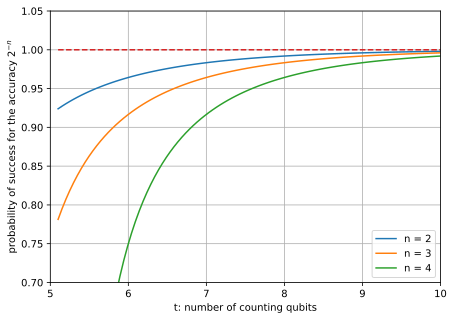

In [4]:
t = np.linspace(5.1, 10, 100)
prob_success_n = [y(t, n) for n in [2, 3, 4]]
prob_n2, prob_n3, prob_n4  = prob_success_n[0], prob_success_n[1], prob_success_n[2]

plt.figure(figsize=(7, 5))
plt.plot(t, prob_n2, t, prob_n3, t, prob_n4, t, [1]*len(t),'--' )
plt.axis([5, 10, 0.7, 1.05])
plt.xlabel('t: number of counting qubits')
plt.ylabel('probability of success for the accuracy $2^{-n}$')
plt.legend(['n = 2', 'n = 3', 'n = 4'], loc='lower right')
plt.grid(True)

![](image/L3_QPEresults.png)

![](image/L3_QPEresults_final.png)

![](image/L3_QPE_final.png)